## ㅁOne Point Tutorial
# `EDA and Visualization`
<p style='text-align: right;'> 빅데이터 분석 중고급과정 with 관악구, KMR</p>
<p style='text-align: right;'> 2023 2nd | All rights reserved by Wooseok Song</p>

---

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    os.chdir("/Users/semojak_hq/Library/CloudStorage/OneDrive-Personal/Lecture/2023/KDS/빅데이터분석_중고급/sample_data/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")  

Directory changed


In [3]:
folder = Path('/Users/semojak_hq/Library/CloudStorage/OneDrive-Personal/Lecture/2023/KDS/빅데이터분석_중고급/sample_data/')
file_path_output = folder / "output.txt"
file_path_output

PosixPath('/Users/semojak_hq/Library/CloudStorage/OneDrive-Personal/Lecture/2023/KDS/빅데이터분석_중고급/sample_data/output.txt')

In [4]:
# titanic_raw = pd.read_csv('train.csv')
titanic_raw = pd.read_csv('train.csv')

In [5]:
titanic_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

### 기본 통계수치 요약 개요

In [6]:
titanic_raw['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### 줄기- 잎 그림

In [7]:
# !pip install stemgraphic
import stemgraphic

(<Figure size 750x500 with 1 Axes>, <Axes: >)

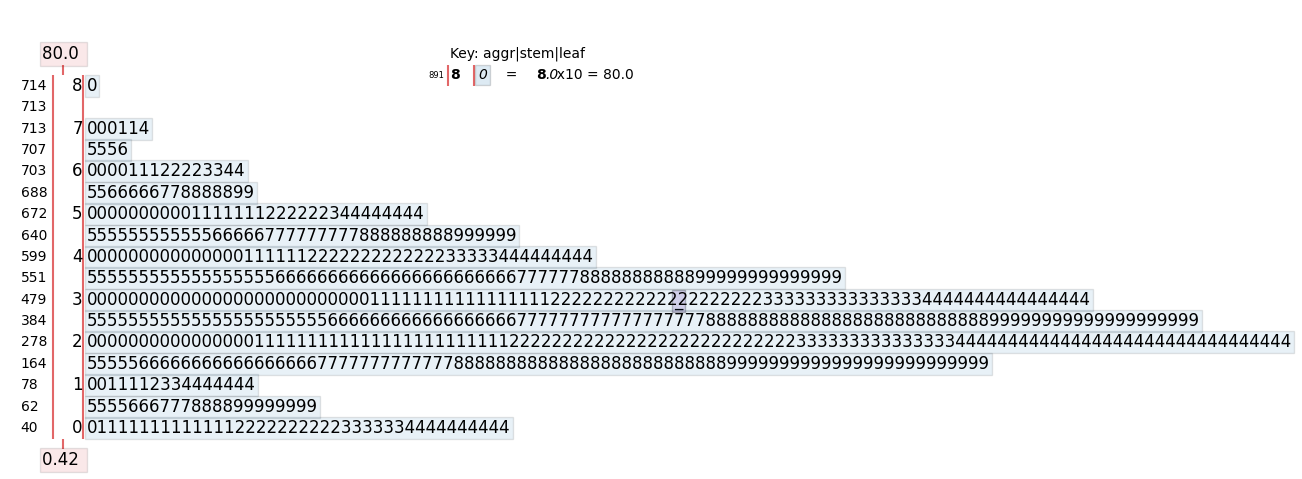

In [8]:
stemgraphic.stem_graphic(titanic_raw['Age'])

**ref. stem** <br/>
http://stemgraphic.org/doc/stemgraphic.pdf

### Boxplot

<Axes: >

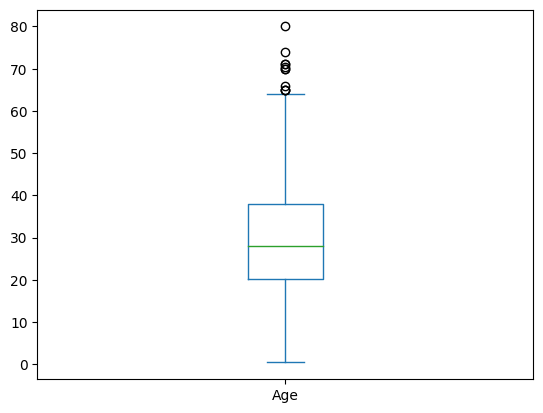

In [9]:
titanic_raw['Age'].plot(kind='box')

가로로 눕혀보면..

<Axes: >

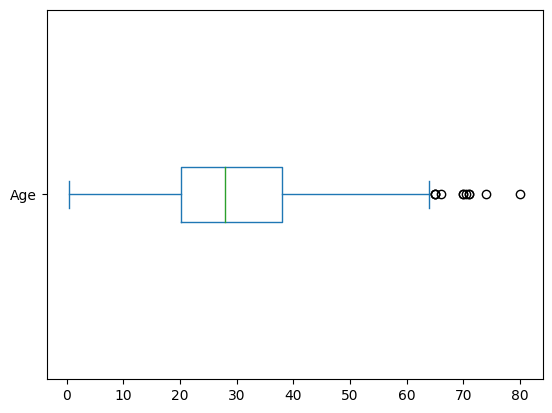

In [10]:
titanic_raw['Age'].plot(vert = False, kind = 'box')

아웃라이어를 빼고 보자.

<Axes: >

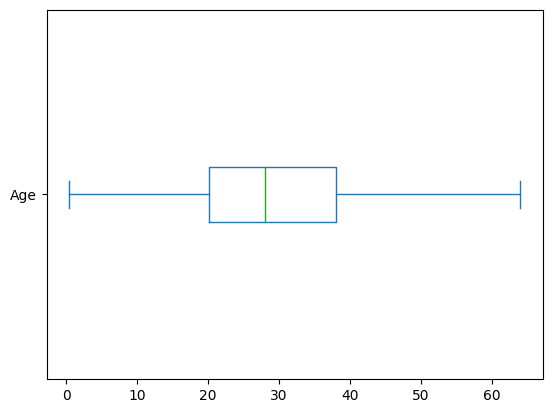

In [11]:
titanic_raw['Age'].plot(vert=False, showfliers=False, kind='box')

### Skewness & Kurtosis - 왜도와 첨도

Q) 숫자형 데이터의 왜도와 첨도를 자동으로 계산하는 함수를 생성하라.

In [12]:
def SnK(x):
    # 4분위수 연산
    Hl = x.describe()['25%']
    M = x.describe()['50%']
    Hu = x.describe()['75%']
    
    # 8분위수 연산(위 4분위수는 본 방식으로도 변형 가능)
    Eu = x.quantile(0.875)
    El = x.quantile(0.125)
    
    # Skew 및 Kurto 수식 코딩
    num1 = (Hu - M) - (M - Hl)
    denom1 = (Hu - M) + (M - Hl)
    num2 = Eu - El
    denom2 = Hu - Hl
    skew = np.round(num1 / denom1, 3)
    kurto = np.round(num2 / denom2 - 1.705, 3)

    # 결과값 저장 및 반환
    result = pd.DataFrame([skew, kurto], index=['Skew: ', 'Kurto: '], columns = ['value'])  
    return result

In [13]:
titanic_age = titanic_raw['Age'].dropna()
SnK(titanic_age)

,value
Skew:,0.119
Kurto:,0.029


Q) 왜도를 자동으로 보정하는 함수를 생성하라.

보정용 파워를 구해보자.

In [14]:
def power_generator(x):
    # 4분위수 연산
    Hl = x.describe()['25%']
    M = x.describe()['50%']
    Hu = x.describe()['75%']

    result = 1 - 2 * M * (Hu - M + Hl - M)/((Hl - M) ** 2 + (Hu - M) ** 2)
    return result

In [15]:
power_generator(titanic_age)

0.26550294146012154

연산된 파워를 이용하여 데이터의 왜도를 보정하는 함수로 업그레이드 해보자.

In [16]:
def skew_adjust(x):
    # 4분위수 연산
    Hl = x.describe()['25%']
    M = x.describe()['50%']
    Hu = x.describe()['75%']
    
    p = 1 - 2 * M * (Hu - M + Hl - M)/((Hl - M) ** 2 + (Hu - M) ** 2)
    
    result = pd.DataFrame(x ** p)
    print('Adjusted Skew with power: ', round(p, 3))
    return result

In [17]:
titanic_age_adjusted = skew_adjust(np.round(titanic_age,2))
titanic_age_adjusted

Adjusted Skew with power:  0.266


,Age
0,2.272046
1,2.626862
2,2.375087
3,2.570127
4,2.570127
...,...
885,2.645041
886,2.399006
887,2.185309
889,2.375087


(<Figure size 750x1350 with 1 Axes>, <Axes: >)

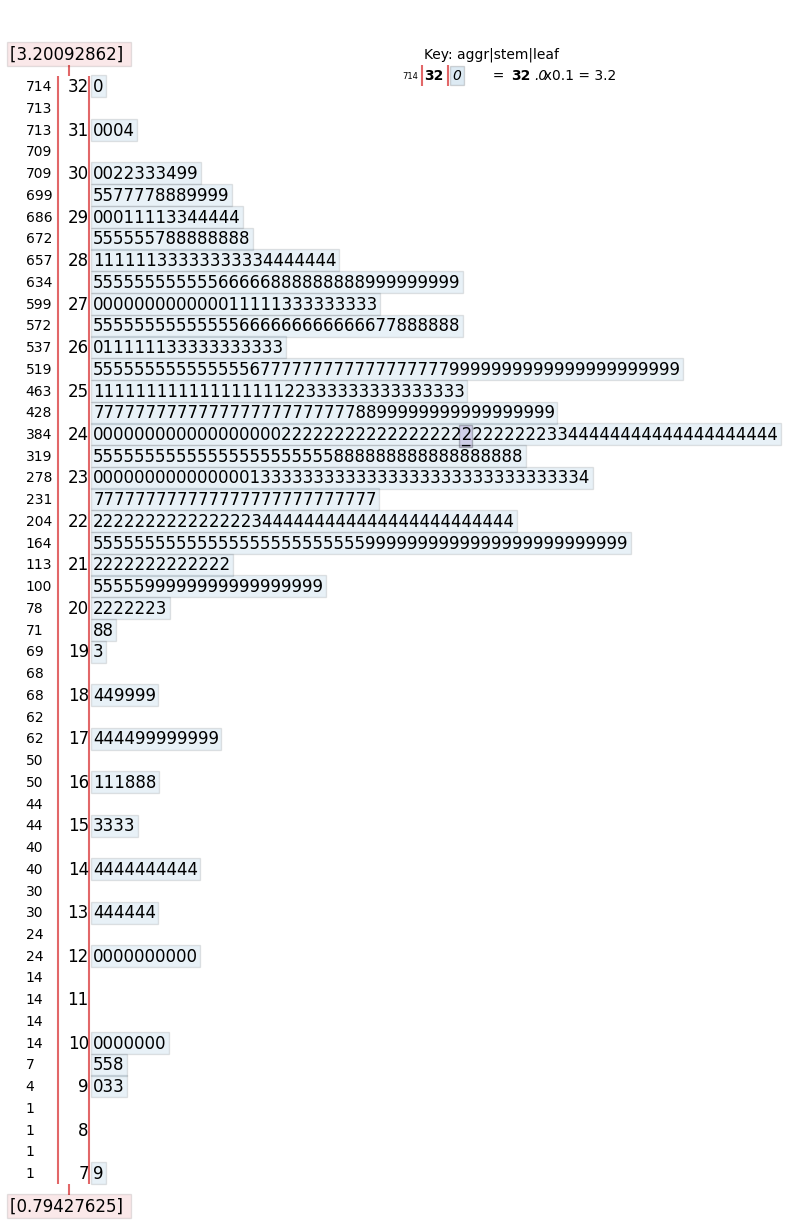

In [18]:
stemgraphic.stem_graphic(titanic_age_adjusted.values)

히스토그램을 그려서 둘을 비교해보자.

<Axes: ylabel='Frequency'>

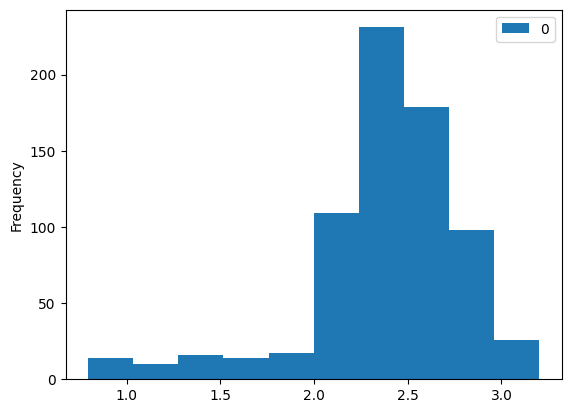

In [19]:
pd.DataFrame(titanic_age_adjusted.values).plot.hist()

<Axes: ylabel='Frequency'>

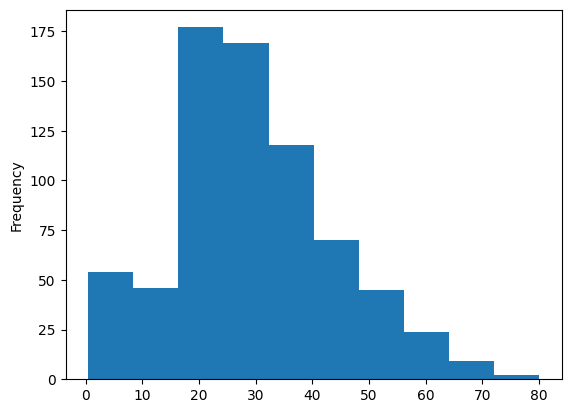

In [20]:
titanic_age.plot.hist()

보정된 값에 존재하는 아웃라이어의 영향으로 썩 마음에 들지는 않는다. <br/>
실무에서는 데이터의 상황에 맞는 보다 정교한 튜닝을 적용하게 된다.

## Data Visuallization

In [21]:
import matplotlib.pyplot as plt
titanic_raw2 = titanic_raw[titanic_raw['Fare'] < 500]

### Basic - point

<Axes: xlabel='Pclass', ylabel='Age'>

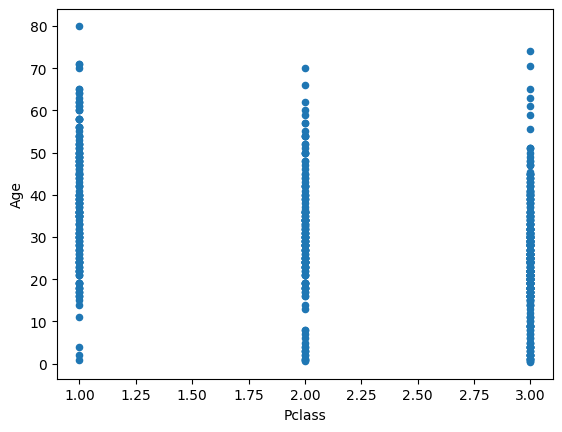

In [22]:
titanic_raw2.plot(x='Pclass', y='Age', kind='scatter')

### Basic
#### jitter

<Axes: xlabel='jitterP', ylabel='Age'>

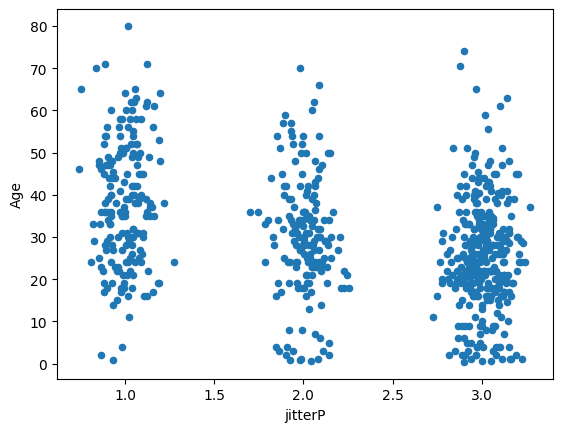

In [23]:
# jitter가 없기에 직접 만들어야한다.
titanic_raw2 = titanic_raw2.assign(jitterP = 
                                   lambda x: x.Pclass + 
                                   np.random.normal(0, 0.1, titanic_raw2.shape[0])) 
titanic_raw2.plot(x='jitterP', y='Age', kind='scatter')

#### color

<Axes: xlabel='jitterP', ylabel='Age'>

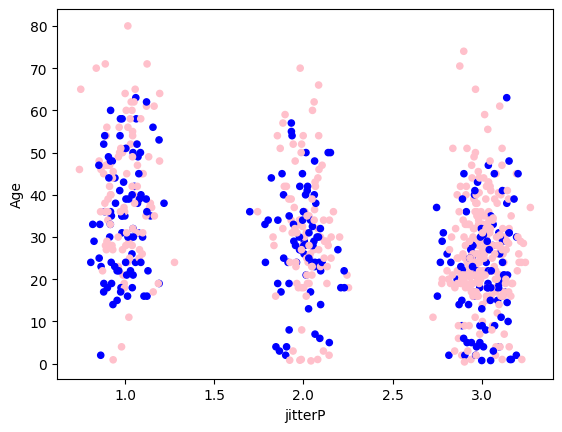

In [24]:
# matplotlib.pyplot(혹은 pandas) 기반의 시각화는 어렵다
def col_mapping(gender):
     custom_coloarmap = {'male': 'pink', 'female': 'blue'}
     return custom_coloarmap[gender]
titanic_raw2.plot(x='jitterP', y='Age', 
                  c=list(map(col_mapping, titanic_raw2.Sex)), kind='scatter')

#### size

<Axes: xlabel='jitterP', ylabel='Age'>

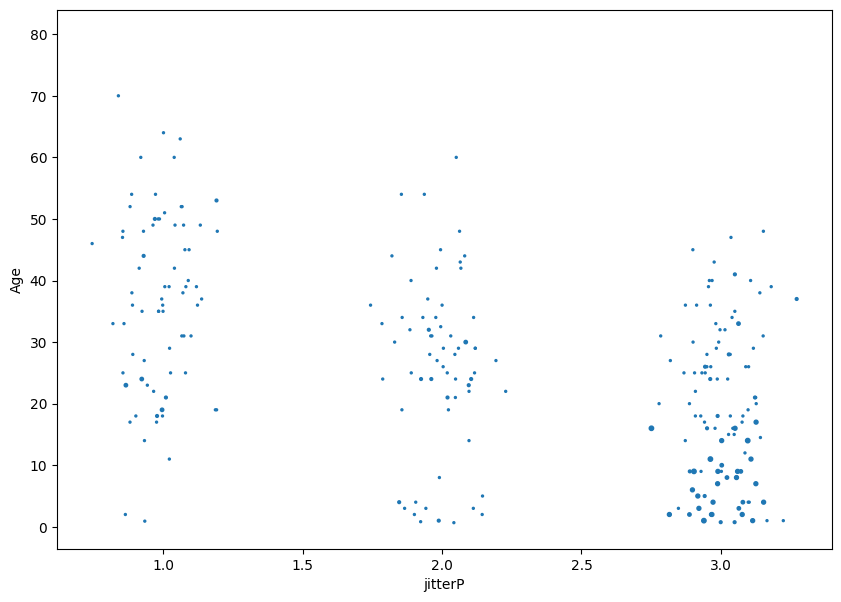

In [25]:
titanic_raw2.plot(x='jitterP', y='Age', 
                  s=2 * titanic_raw2.SibSp, kind='scatter', figsize = (10, 7))

#### color + size

<Axes: xlabel='jitterP', ylabel='Age'>

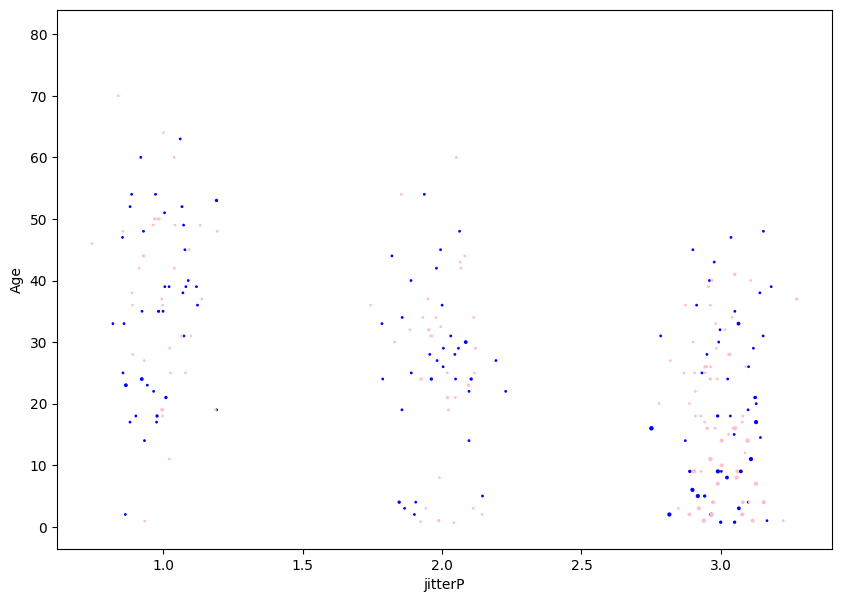

In [26]:
# 'matplotlib.pyplot 기반의 시각화는 어렵다.' * 100
titanic_raw2.plot(x='jitterP', y='Age', 
                  c=list(map(col_mapping, titanic_raw2.Sex)), 
                  s=titanic_raw2.SibSp, kind='scatter', 
                  figsize = (10, 7))

#### color + size + grid

<Axes: xlabel='jitterP', ylabel='Age'>

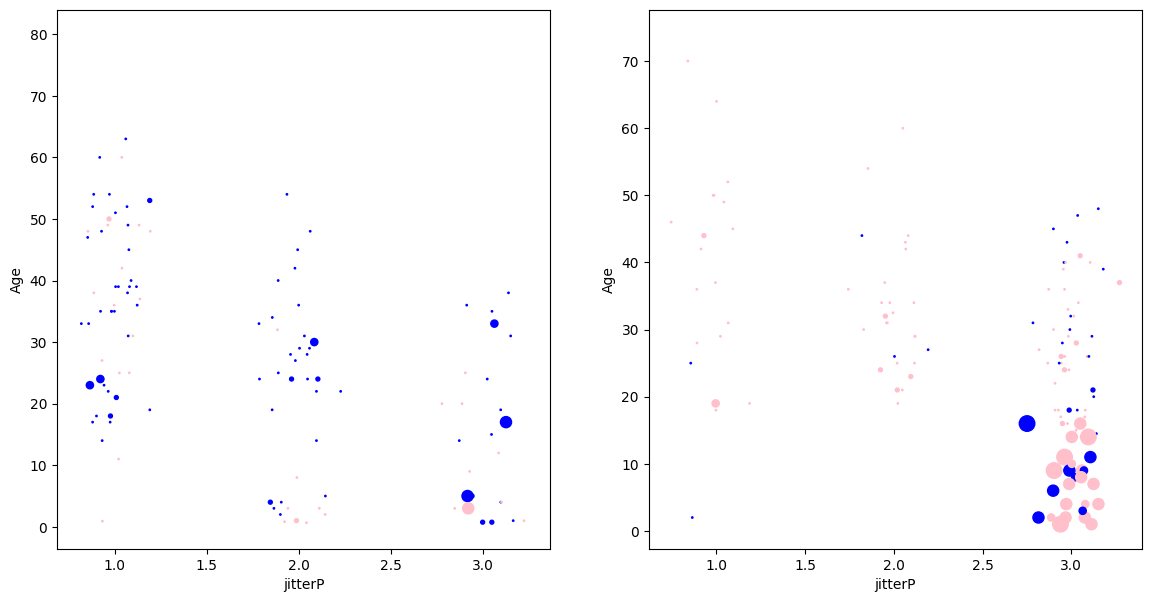

In [37]:
titanic_raw2_survived = titanic_raw2[titanic_raw2['Survived']==1]
titanic_raw2_notsurvived = titanic_raw2[titanic_raw2['Survived']==0]

fig, axes = plt.subplots(nrows=1, ncols=2)

titanic_raw2_survived.plot(x='jitterP', y='Age', ax=axes[0], c=list(map(col_mapping, titanic_raw2_survived.Sex)), s=titanic_raw2_survived['SibSp']**3, kind='scatter', figsize=(14, 7))
titanic_raw2_notsurvived.plot(x='jitterP', y='Age', ax=axes[1], c=list(map(col_mapping, titanic_raw2_notsurvived.Sex)), s=titanic_raw2_notsurvived['SibSp']**3, kind='scatter')